In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def make_data(N, f =0.3, rseed =1):
    rng = np.random.RandomState(rseed)
    X = rng.randn(N)
    X [int(f*N):] += 5
    return X
x = make_data(1000)

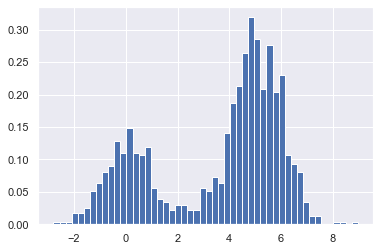

In [9]:
hist=plt.hist(x, bins = 50, density = True);

In [12]:
density, bins, patches = hist
print(len(bins[1:]))
print(len(bins[:-1]))
widths = bins[1:]-bins[:-1]
(density*widths).sum()

50
50


1.0

In [13]:
x = make_data(20)
bins = np.linspace(-5,10,10)

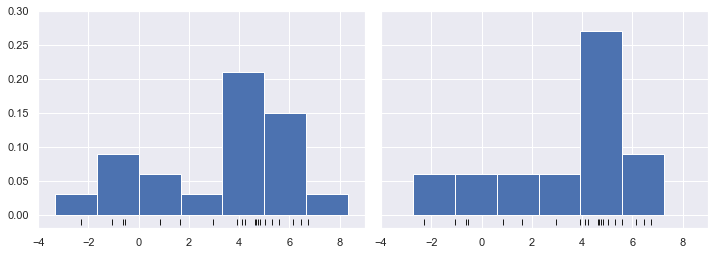

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12, 4),
                      sharey=True, sharex = True,
                      subplot_kw={'xlim':(-4,9),
                                 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace = 0.05)
for i, offset in enumerate([0, 0.6]):
    ax[i].hist(x, bins = bins+offset, density = True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

In [17]:
np.histogram(x, bins)

(array([0, 1, 3, 2, 1, 7, 5, 1, 0]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ]))

[-4, 8, -0.2, 5]

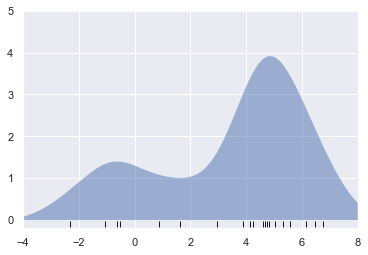

In [19]:
from scipy.stats import norm
x_d = np.linspace(-4,8,1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha = 0.5)
plt.plot(x, np.full_like(x,-0.1), '|k', markeredgewidth = 1)
plt.axis([-4,8, -0.2,5])

# Kernel Density Estimation in practice

In [20]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(x[:,np.newaxis])

KernelDensity()

In [21]:
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:,None])

(-0.02, 0.22)

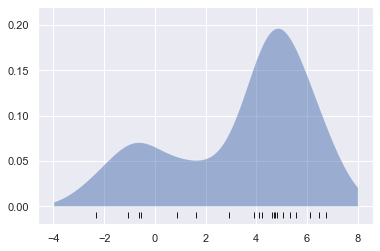

In [22]:
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

# Selecting bandwidth with cross validation 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
bandwidth = 10**np.linspace(-1,1,100)
grid = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                   {'bandwidth': bandwidth},
                   cv = LeaveOneOut())
grid.fit(x[:, None]);

In [32]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [ ]:
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()
latlon = np.vstack([data.train['dd lat'],
                  data.train['dd lon']]).T
species = np.array([d.decode('ascii').startwith('micro')
                   for d in data.train['species']], dtype = 'int')

In [33]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
xgrid, ygrid = construct_grid(data)
# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'